# Craft a Story from a Dataset Exercise

1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
    - Dataset: Music & Mental Health Survey Results
    - Link to datset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?resource=download
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
    - __
4. Take a look at the data: explore it.
5. Think of a narrative, and pursue it.
6. Give a 15 mins presentation to your mentor during your next call.

In your quest, you might need to ask a bunch of other questions, such as:
- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities?
- Can I make a scatterplot?
- Can I make a time-series plot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask?

Submission: Submit links to a GitHub repository containing a Jupyter Notebook or a
PowerPoint. The file should contain:
- The questions you asked
- The trends you investigated
- The resulting visualizations and conclusions

## About the dataset:
(From the kaggle source)

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health.

Block 0: Background

Respondents answer generic questions focused on musical background and listening habits.
Block 1: Music genres

Respondents rank how often they listen to 16 music genres, where they can select:

    Never
    Rarely
    Sometimes
    Very frequently

Block 2: Mental health

Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:

    0 - I do not experience this.
    10 - I experience this regularly, constantly/or to an extreme.


## Column Descriptions

- Timestamp
    - Date and time when form was submitted
- Age
    - Respondent's age
- Primary streaming service
    - Respondent's primary streaming service
- Hours per day
    - Number of hours the respondent listens to music per day
- While working
    - Does the respondent listen to music while studying/working?
- Instrumentalist
    - Does the respondent play an instrument regularly?
- Composer
    - Does the respondent compose music?
- Fav genre
    - Respondent's favorite or top genre
- Exploratory
    - Does the respondent actively explore new artists/genres?
- Foreign languages
    - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM
    - Beats per minute of favorite genre
    - Interesting article on bpm limits: https://boilerroom.tv/article/extreme-bpms
- Frequency [...] (16 cols)
    - How frequently the respondent listens to ... music
- [Mental health] (4 cols)
    - self-reported scale of 0 to 10
-  Music effects
    - Does music improve/worsen respondent's mental health conditions?
- Permissions
    - Permissions to publicize data

# Imports

In [1]:
%matplotlib inline

#data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#plotting and visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [2]:
df_mxmh = pd.read_csv('mxmh_survey_results.csv')
df_mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Edit col names to all lowercase & replace whitespace with underscore

In [3]:
df_mxmh.columns = df_mxmh.columns.str.lower()
print(df_mxmh.columns)

Index(['timestamp', 'age', 'primary streaming service', 'hours per day',
       'while working', 'instrumentalist', 'composer', 'fav genre',
       'exploratory', 'foreign languages', 'bpm', 'frequency [classical]',
       'frequency [country]', 'frequency [edm]', 'frequency [folk]',
       'frequency [gospel]', 'frequency [hip hop]', 'frequency [jazz]',
       'frequency [k pop]', 'frequency [latin]', 'frequency [lofi]',
       'frequency [metal]', 'frequency [pop]', 'frequency [r&b]',
       'frequency [rap]', 'frequency [rock]', 'frequency [video game music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music effects',
       'permissions'],
      dtype='object')


In [4]:
df_mxmh.columns = df_mxmh.columns.str.replace(' ', '_')
print(df_mxmh.columns)

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_[classical]',
       'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
       'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]',
       'frequency_[k_pop]', 'frequency_[latin]', 'frequency_[lofi]',
       'frequency_[metal]', 'frequency_[pop]', 'frequency_[r&b]',
       'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music_effects',
       'permissions'],
      dtype='object')


## Explore the dataframe

In [5]:
print(df_mxmh.info())
print('\n')
print(f'shape:\n{df_mxmh.shape[1]} columns\n{df_mxmh.shape[0]} rows')
print('\n')
print('Count of unique values per column:')
print(df_mxmh.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     736 non-null    object 
 1   age                           735 non-null    float64
 2   primary_streaming_service     735 non-null    object 
 3   hours_per_day                 736 non-null    float64
 4   while_working                 733 non-null    object 
 5   instrumentalist               732 non-null    object 
 6   composer                      735 non-null    object 
 7   fav_genre                     736 non-null    object 
 8   exploratory                   736 non-null    object 
 9   foreign_languages             732 non-null    object 
 10  bpm                           629 non-null    float64
 11  frequency_[classical]         736 non-null    object 
 12  frequency_[country]           736 non-null    object 
 13  frequ

# EDA (before wrangling)

## Outlier detection
- Box plots

<Axes: >

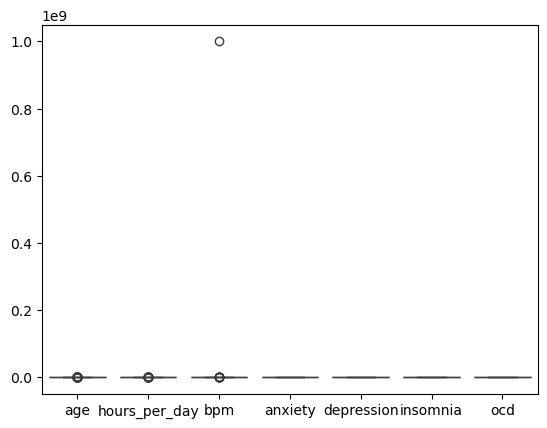

In [6]:
sns.boxplot(df_mxmh)

BPM seems to have an extreme outlier

In [7]:
df_mxmh['bpm'].value_counts(dropna=False).sort_index(ascending=False)

bpm
999999999.0      1
624.0            1
220.0            2
218.0            1
210.0            2
              ... 
20.0             1
8.0              1
4.0              1
0.0              3
NaN            107
Name: count, Length: 136, dtype: int64

Looks like 2 outliers for bpm (999999999.0 & 624.0)

That bpm 999999999.0 is possible but so exceedingly rare and would not be the bpm of a whole genre and the 624.0 is improbable, double checking the rows where these values occur

In [8]:
df_mxmh[df_mxmh['bpm']==999999999.0]

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
568,9/4/2022 15:41:59,16.0,Spotify,7.0,Yes,No,No,Video game music,Yes,No,999999999.0,Never,Rarely,Sometimes,Rarely,Never,Rarely,Rarely,Never,Never,Never,Very frequently,Sometimes,Never,Very frequently,Rarely,Sometimes,4.0,8.0,8.0,4.0,No effect,I understand.


Row 568 contains the impossible outlier, need to decide what to do with it.

Opting to impute the mean of the genre (video game music)

In [9]:
#Gives mean of the bpm for video game music genre
    #gives warning when using to replace value for outlier since changing the same row I'd be dropping in the calculation
print('long calc for bpm for video game music:', df_mxmh[df_mxmh["fav_genre"]=='Video game music'].drop(index=568).bpm.mean())

long calc for bpm for video game music: 119.75


In [10]:
df_mxmh.loc[568, 'bpm'] = df_mxmh[df_mxmh["fav_genre"]=='Video game music'].drop(index=568).bpm.mean()
print(df_mxmh.loc[568])

timestamp                       9/4/2022 15:41:59
age                                          16.0
primary_streaming_service                 Spotify
hours_per_day                                 7.0
while_working                                 Yes
instrumentalist                                No
composer                                       No
fav_genre                        Video game music
exploratory                                   Yes
foreign_languages                              No
bpm                                        119.75
frequency_[classical]                       Never
frequency_[country]                        Rarely
frequency_[edm]                         Sometimes
frequency_[folk]                           Rarely
frequency_[gospel]                          Never
frequency_[hip_hop]                        Rarely
frequency_[jazz]                           Rarely
frequency_[k_pop]                           Never
frequency_[latin]                           Never


In [11]:
df_mxmh[df_mxmh['bpm']== 624.0]

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
644,9/13/2022 1:55:43,16.0,Other streaming service,4.0,Yes,No,No,EDM,Yes,Yes,624.0,Sometimes,Never,Very frequently,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve,I understand.


In [14]:
# mean of edm bpm excluding the outlier

df_mxmh[df_mxmh["fav_genre"]=='EDM'].drop(644).bpm.mean()

133.88571428571427

The mean is strong evidence that a bpm of 624.0 (even for EDM is too high)

It's not impossible but as a bpm for the genre, it is an outlier